In [1]:
import os
from matplotlib import pyplot as plt
from nnAudio.Spectrogram import CQT1992v2
from scipy import signal, fft
from scipy.signal import butter, lfilter
import numpy as np
import torch
import math
from scipy.interpolate import interp1d
from scipy.signal import butter, lfilter


BATCH_SIZE = 256
EPOCHS = 1
EXAMPLE_IDENTIFIER_1 = "00000e74ad"
EXAMPLE_IDENTIFIER_0 = "00001f4945"
RANDOM_SAMPLE_SIZE = 1
PERFORM_FITTING = True
SAMPLING_FREQUENCY = 2048
SAMPLES_1 = 4096
SAMPLES_3 = 3 * SAMPLES_1
USE_TRAIN_SUBSET = False
USE_TEST_SUBSET = False
SUBSET_SIZE = 1024
LEARNING_RATE = 0.001
TRAIN_TEST_SPLIT = 0.95





def get_array(identifier):
     path = f"{identifier}.npy"
     return np.load(path)
	 

def whiten(waveform):
     window = signal.hann(waveform.size)
     spectrum = fft.fft(waveform * window)
     mag = np.sqrt(np.real(spectrum*np.conj(spectrum)))
     return np.real(fft.ifft(spectrum/mag)) * np.sqrt(len(waveform)/2)
	 
def get_whitened_data(id, detector):
     return whiten(get_array(id)[detector])
	 

def butter_bandpass(lowcut, highcut, fs, order=5):
     nyq = 0.5 * fs
     low = lowcut / nyq
     high = highcut / nyq
     b, a = butter(order, [low, high], btype='band')
     return b, a
	 

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
     y = lfilter(b, a, data)
     return y
	 


def get_cqt_spectrogram_of_data(data):
     cqt = CQT1992v2(sr=SAMPLING_FREQUENCY, hop_length=64, fmin=20, fmax=1024, bins_per_octave=12, norm=1, window='hann', center=True, pad_mode='reflect', trainable=False, output_format='Magnitude', verbose=False)
     waveform = data
     waveform = waveform / np.max(waveform)
     waveform = torch.from_numpy(waveform).float()
     cqt_image = cqt(waveform)
     cqt_image = np.array(cqt_image)
     cqt_image = np.transpose(cqt_image, (1,2,0))
     return cqt_image
	 



def get_array(identifier):
     path = f"{identifier}.npy"
     return np.load(path)
	 

def whiten(waveform):
     window = signal.hann(waveform.size)
     spectrum = fft.fft(waveform * window)
     mag = np.sqrt(np.real(spectrum*np.conj(spectrum)))
     return np.real(fft.ifft(spectrum/mag)) * np.sqrt(len(waveform)/2)
	 
def get_whitened_data(id, detector):
     return whiten(get_array(id)[detector])
	 

def butter_bandpass(lowcut, highcut, fs, order=5):
     nyq = 0.5 * fs
     low = lowcut / nyq
     high = highcut / nyq
     b, a = butter(order, [low, high], btype='band')
     return b, a
	 

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
     y = lfilter(b, a, data)
     return y
	 


def get_cqt_spectrogram_of_data(data):
     cqt = CQT1992v2(sr=SAMPLING_FREQUENCY, hop_length=64, fmin=20, fmax=1024, bins_per_octave=12, norm=1, window='hann', center=True, pad_mode='reflect', trainable=False, output_format='Magnitude', verbose=False)
     waveform = data
     waveform = waveform / np.max(waveform)
     waveform = torch.from_numpy(waveform).float()
     cqt_image = cqt(waveform)
     cqt_image = np.array(cqt_image)
     cqt_image = np.transpose(cqt_image, (1,2,0))
     return cqt_image
	 




lowcut=50
highcut=500
id= "fac5791f7b"


C:\Python39\lib\site-packages\nnAudio\Spectrogram.py:4: Warning: importing Spectrogram subpackage will be deprecated soon. You should import the feature extractor from the feature subpackage. See actual documentation.
  warnings.warn(


In [3]:
os.getcwd()

whitened_data0 = get_whitened_data(id, 0)
whitened_data1 = get_whitened_data(id, 1)
whitened_data2 = get_whitened_data(id, 2)

bandpassed_data0 = butter_bandpass_filter(whitened_data0, lowcut, highcut, whitened_data0.size)
bandpassed_data1 = butter_bandpass_filter(whitened_data1, lowcut, highcut, whitened_data1.size)
bandpassed_data2 = butter_bandpass_filter(whitened_data2, lowcut, highcut, whitened_data2.size)


image0 = get_cqt_spectrogram_of_data(whitened_data0)
image1 = get_cqt_spectrogram_of_data(whitened_data1)
image2 = get_cqt_spectrogram_of_data(whitened_data2)




C:\Python39\lib\site-packages\nnAudio\utils.py:429: SyntaxWarning: If fmax is given, n_bins will be ignored
  warnings.warn("If fmax is given, n_bins will be ignored", SyntaxWarning)


Text(0, 0.5, 'scaled frequency')

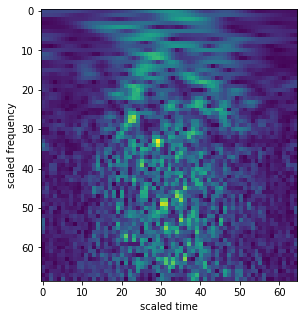

In [5]:
    plt.figure(figsize=(20,5))
    plt.imshow(image0)
    plt.xlabel("scaled time")
    plt.ylabel("scaled frequency")

Text(0, 0.5, 'scaled frequency')

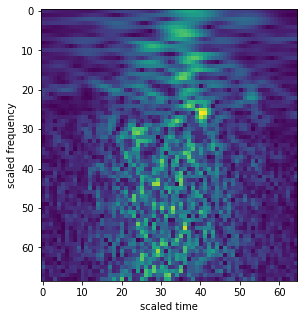

In [6]:
    plt.figure(figsize=(20,5))
    plt.imshow(image1)
    plt.xlabel("scaled time")
    plt.ylabel("scaled frequency")

Text(0, 0.5, 'scaled frequency')

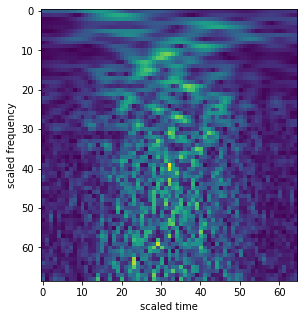

In [7]:
    plt.figure(figsize=(20,5))
    plt.imshow(image2)
    plt.xlabel("scaled time")
    plt.ylabel("scaled frequency")

In [7]:
import random
import numpy


number = int(input( "get number" ))

myMean = 0.0
myList = []
myList.


for index in range(number):
    myMean += random.randint(0,1000)
    myMean /= 2



for index in range(number):
    myMean += random.randint(0,10000)
    myMean /= 2


for index in range(number):
    myMean += random.randint(0,100000)
    myMean /= 2

for index in range(number):
    myMean += random.randint(0,1000000)
    myMean /= 2            

print(int(myMean))    






606313
